In [1]:
# imports
import functools
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df_business = pd.read_csv('./initial_setup/dataset/business_las_vegas_restaurant_dataset.csv', sep=',', header=0)
df_business.count()

business_id     6153
is_open         6153
latitude        6153
longitude       6153
postal_code     6139
review_count    6153
stars           6153
dtype: int64

In [3]:
df_reviews = pd.read_csv('./initial_setup/dataset/review_las_vegas_restaurant_dataset.csv', sep=',', header=0)
df_reviews.count()

business_id    1054090
review_id      1054090
stars          1054089
text           1054089
user_id        1054088
dtype: int64

In [4]:
stars = df_reviews.groupby("stars").count()
stars

,business_id,review_id,text,user_id
stars,,,,
1.0,120666,120666,120666,120666
2.0,94155,94155,94155,94155
3.0,137222,137222,137222,137222
4.0,261964,261964,261964,261964
5.0,440082,440082,440082,440081


In [5]:
df_business.head()

,business_id,is_open,latitude,longitude,postal_code,review_count,stars
0,vJIuDBdu01vCA8y1fwR1OQ,0,36.192284,-115.159272,89106.0,3,1.5
1,kgffcoxT6BQp-gJ-UQ7Czw,1,36.201794,-115.281981,89128.0,13,2.5
2,0jtRI7hVMpQHpUVtUy4ITw,1,36.201990,-115.283122,89128.0,242,4.0
3,JJEx5wIqs9iGGATOagE8Sg,0,36.271169,-115.267759,89149.0,4,2.0
4,zhxnD7J5_sCrKSw5cwI9dQ,1,36.173140,-115.077945,89110.0,16,1.5


In [6]:
reviews = df_reviews[0:int((df_reviews["business_id"].count())/20)]
reviews.head()

,business_id,review_id,stars,text,user_id
0,COaVc7XvpjKmKv_EmAnrOA,vJIuDBdu01vCA8y1fwR1OQ,1.0,Absolutely Terrible! \nStaff are ignorant and ...,TxrdOyD7SU06Tj-rnOCQ9A
1,vJIuDBdu01vCA8y1fwR1OQ,UgwmWy_68S_aKR9wTWKGOg,3.0,I am a huge fan of both locally owned business...,jSD05fFrAFa5gX3ZQae1tw
2,vJIuDBdu01vCA8y1fwR1OQ,AywPsODuQbUMhBEjmKiGXw,1.0,Let me start off by saying. If you cant make a...,oagZh5A2cWJXZBLakS_KpQ
3,vJIuDBdu01vCA8y1fwR1OQ,6j39TEUBDBTEK37OKACWLw,1.0,Decent product. ..HORRIBLE service. Totally un...,6BSwuyc7fvcccJgrY4_W5Q
4,kgffcoxT6BQp-gJ-UQ7Czw,c6iTbCMMYWnOd79ZiWwobg,1.0,"I ordered a few 12 inch sandwiches , a turkey ...",ih7Dmu7wZpKVwlBRbakJOQ


In [7]:
import re 
from PIL import Image
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)|[^a-zA-Z#]")
stopwords_set = set(nltk.corpus.stopwords.words('english'))

positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(', 'dirty','waited','wait','ignorant']
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]

In [9]:
##Funções
def word_feats(words):
    return dict([(word, True) for word in words])

def preprocess_reviews(review):
    review = word_tokenize(review)
    review = [REPLACE_NO_SPACE.sub("", line.lower()) for line in review]
    review =  [word for word in review if not word in stopwords_set]
    return review

def preprocess_reviews2(review):
    review = review.lower()
    review = re.sub('[^a-zA-Z#]+', ' ', review)
    review = re.sub('(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])',' ', review)
    review = word_tokenize(review)
    review =  [word for word in review if not word in stopwords_set]
    return review

def join_text(text):
    text = " ".join(review for review in text)
    return text

def cloudword(words, color):
    wordcloud = WordCloud(background_color=color).generate(words)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show() 

In [10]:
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]    
    
train_set = negative_features + positive_features + neutral_features
 
classifier = NaiveBayesClassifier.train(train_set) 

seti = []

def sentimental(review):

        
    words = preprocess_reviews(review)
    # Predict
    neg = 0
    pos = 0
    for word in words:
        classResult = classifier.classify( word_feats(word))
        if classResult == 'neg':
            neg = neg + 1
        if classResult == 'pos':
            pos = pos + 1
    seti.append([float(pos)/len(words), float(neg)/len(words)])
    
for index, review in zip(reviews.index.values, reviews["text"]):
    sentimental(review)  
        
 
dataset = pd.DataFrame(seti)
dataset.columns = ['positive_1', 'negative_1']

reviews = pd.concat([reviews,dataset],axis=1) 

In [11]:
for business in df_business["business_id"]:
    group_reviews = reviews["business_id"]==business
    pos1 = np.average(reviews[group_reviews]["positive_1"])
    neg1 = np.average(reviews[group_reviews]["negative_1"])
    
    df_business.loc[df_business["business_id"] == business,"positive1"] = pos1
    df_business.loc[df_business["business_id"] == business,"negative1"] = neg1

/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
df_business[["business_id","is_open","stars","positive1","negative1"]][0:30]

,business_id,is_open,stars,positive1,negative1
0,vJIuDBdu01vCA8y1fwR1OQ,0,1.5,0.459298,0.272719
1,kgffcoxT6BQp-gJ-UQ7Czw,1,2.5,0.509797,0.192683
2,0jtRI7hVMpQHpUVtUy4ITw,1,4.0,0.489469,0.210782
3,JJEx5wIqs9iGGATOagE8Sg,0,2.0,0.519074,0.144339
4,zhxnD7J5_sCrKSw5cwI9dQ,1,1.5,0.483532,0.229275
5,2kWrSFkIes_d2BMg4YrRtA,1,2.5,0.473517,0.266726
6,6llKs7K_tn8ChXcIM-oTvg,1,4.5,0.517637,0.174162
7,YV9GVfmDSDM7HSV0jVdTOA,1,3.0,0.471690,0.240957
8,F7OsiFk9aLZtqZczA84xpw,1,2.0,0.513746,0.220510
9,XeDLyY2a7nZ3IEY4RYslXA,1,3.5,0.443863,0.253235


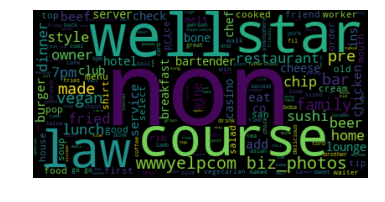

In [13]:
pos_words = reviews["stars"] > 3

mergelist = []
for review in reviews[pos_words]["text"]:
    mergelist = mergelist + preprocess_reviews(review)
    

unique, counts = np.unique(mergelist, return_counts=True)

positive_words=[]

for u, c in zip(unique,counts):
    if c>4:
        positive_words.append(u)   
        
text = join_text(positive_words)

cloudword(text,"black")        

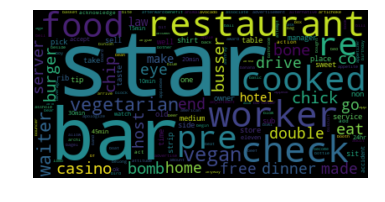

In [14]:
neg_words = reviews["stars"] < 3

mergelist = []
for review in reviews[neg_words]["text"]:
    mergelist = mergelist + preprocess_reviews(review)
    
unique, counts = np.unique(mergelist, return_counts=True)

negative_words=[]

for u, c in zip(unique,counts):
    if c>3:
        negative_words.append(u)
        
text = " ".join(review for review in negative_words)

cloudword(text,"black")      

In [15]:
positive_vocab = positive_words
negative_vocab = negative_words
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]

In [16]:
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]    
    
train_set = negative_features + positive_features + neutral_features
 
classifier = NaiveBayesClassifier.train(train_set) 


seti = []

def sentimental(review):

    words = preprocess_reviews(review)

    # Predict
    neg = 0
    pos = 0

    for word in words:
        classResult = classifier.classify( word_feats(word))
        if classResult == 'neg':
            neg = neg + 1
        if classResult == 'pos':
            pos = pos + 1
    seti.append([float(pos)/len(words), float(neg)/len(words)])
    
for index, review in zip(reviews.index.values, reviews["text"]):
    sentimental(review)  
        
 
dataset = pd.DataFrame(seti)
dataset.columns = ['positive_2', 'negative_2']

reviews = pd.concat([reviews,dataset],axis=1) 

In [17]:
for business in df_business["business_id"]:
    group_reviews = reviews["business_id"]==business
    pos1 = np.average(reviews[group_reviews]["positive_2"])
    neg1 = np.average(reviews[group_reviews]["negative_2"])
    
    df_business.loc[df_business["business_id"] == business,"positive2"] = pos1
    df_business.loc[df_business["business_id"] == business,"negative2"] = neg1


In [18]:
df_business[["business_id","is_open","stars","positive1","negative1","positive2","negative2"]][0:30]

,business_id,is_open,stars,positive1,negative1,positive2,negative2
0,vJIuDBdu01vCA8y1fwR1OQ,0,1.5,0.459298,0.272719,1.000000,0.000000
1,kgffcoxT6BQp-gJ-UQ7Czw,1,2.5,0.509797,0.192683,1.000000,0.000000
2,0jtRI7hVMpQHpUVtUy4ITw,1,4.0,0.489469,0.210782,0.999032,0.000907
3,JJEx5wIqs9iGGATOagE8Sg,0,2.0,0.519074,0.144339,0.997863,0.002137
4,zhxnD7J5_sCrKSw5cwI9dQ,1,1.5,0.483532,0.229275,0.998322,0.001301
5,2kWrSFkIes_d2BMg4YrRtA,1,2.5,0.473517,0.266726,0.996466,0.003534
6,6llKs7K_tn8ChXcIM-oTvg,1,4.5,0.517637,0.174162,0.993827,0.006173
7,YV9GVfmDSDM7HSV0jVdTOA,1,3.0,0.471690,0.240957,0.998914,0.000221
8,F7OsiFk9aLZtqZczA84xpw,1,2.0,0.513746,0.220510,0.997958,0.001699
9,XeDLyY2a7nZ3IEY4RYslXA,1,3.5,0.443863,0.253235,0.998399,0.001255
